<a href="https://colab.research.google.com/github/aneeshcheriank/hands-own-machine-learning/blob/main/selecting_learning_rate.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
import tensorflow as tf
from tensorflow import keras
import numpy as np
from tensorflow.keras.datasets import mnist
import math

# download data
(x_train, y_train), (x_test, y_test) = mnist.load_data()

def data_processing(img):
    img = np.expand_dims(img, axis=3)
    img = img/255.
    
    return img

x_train_processed = data_processing(x_train)
x_test_processed = data_processing(x_test)

print(f'x_train shape: {x_train_processed.shape}')


LR = 10e-5

if __name__ == '__main__':
  model = keras.Sequential([
    keras.layers.Conv2D(8, (2,2), activation='elu', 
                        kernel_initializer='he_normal', 
                        input_shape=(28,28,1))
    , keras.layers.MaxPooling2D((2,2))
    , keras.layers.Conv2D(16, (2, 2), activation='elu', 
                          kernel_initializer='he_normal')
    , keras.layers.MaxPooling2D((2, 2))
    , keras.layers.Flatten()
    , keras.layers.Dense(64, activation='elu', 
                         kernel_initializer='he_normal')
    , keras.layers.Dense(10, activation='softmax')
  ])

  model.compile(
    loss = 'sparse_categorical_crossentropy',
    optimizer=keras.optimizers.Adam(learning_rate=LR),
    metrics=['acc']
  )

  def lr_scheduler(epoch, lr):
    # begining of every epoch lr get updated
    k = (math.exp(math.log(10e6)/500))
    if epoch == 1:
      lr = lr
    else:
      lr *= k
    
    return lr

  cb_lr = keras.callbacks.LearningRateScheduler(lr_scheduler)

  history = model.fit(
    x_train_processed, y_train,
    epochs = 500,
    batch_size = 1024,
    validation_split=0.25,
    callbacks = [
        cb_lr
    ]
  )

11501568/11490434 [==============================] - 0s 0us/step
x_train shape: (60000, 28, 28, 1)
Epoch 1/500
44/44 [==============================] - 14s 27ms/step - loss: 2.2162 - acc: 0.2109 - val_loss: 1.8242 - val_acc: 0.3786 - lr: 1.0328e-04
Epoch 2/500
44/44 [==============================] - 1s 17ms/step - loss: 1.5795 - acc: 0.5321 - val_loss: 1.3182 - val_acc: 0.6611 - lr: 1.0328e-04
Epoch 3/500
44/44 [==============================] - 1s 17ms/step - loss: 1.1400 - acc: 0.7184 - val_loss: 0.9434 - val_acc: 0.7780 - lr: 1.0666e-04
Epoch 4/500
44/44 [==============================] - 1s 17ms/step - loss: 0.8403 - acc: 0.8003 - val_loss: 0.7130 - val_acc: 0.8313 - lr: 1.1015e-04
Epoch 5/500
44/44 [==============================] - 1s 17ms/step - loss: 0.6588 - acc: 0.8384 - val_loss: 0.5737 - val_acc: 0.8609 - lr: 1.1376e-04
Epoch 6/500
44/44 [==============================] - 1s 17ms/step - loss: 0.5436 - acc: 0.8616 - val_loss: 0.4840 - val_acc: 0.8778 - lr: 1.1749e-04
Epoch 

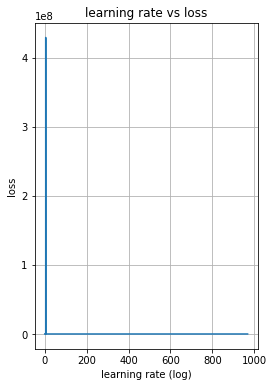

In [13]:
import matplotlib.pyplot as plt

value = 334
loss = history.history['loss']
lr = history.history['lr']
log_lr = np.log(lr)

plt.figure(figsize=(4, 6))
plt.plot(lr, loss)
plt.grid(True)
plt.title('learning rate vs loss')
plt.xlabel('learning rate (log)')
plt.ylabel('loss')
plt.show();

In [10]:
math.exp(math.log(10e6)/500)**500

9999999.999999808

In [8]:
import math
(math.exp(math.log(10e6)/500))**500

9999999.999999808